In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
N = 1e-5
f = 1e-8
alpha = (0.4225*f/N) # note changed the angle name to alppha for consistency
gamma = 1
S2 = N*alpha/f
omega = np.arange(0,2.1,0.1)

In [91]:
alpha

0.00042249999999999997

In [92]:
def theta(omega):
    top = -1*(1+omega**2)*(1-gamma)+gamma*S2
    bottom = 1+omega**2
    return -1*(top/bottom)**(0.5)

In [96]:
def k(omega):
    t = theta(omega)
    tp = (1+S2+omega**2)*(np.arctan(t))
    bttm = S2*(-1*(1+omega**2)*(1-gamma)+gamma*S2)
    return tp/(bttm)**(0.5)

In [97]:
k_list = k(omega)

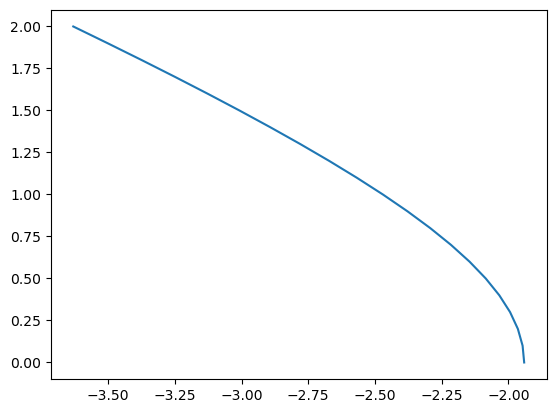

In [98]:
plt.plot(k_list,omega)